In [1]:
import numpy as np
ln = np.log
from numpy import * # :)
import json
from time import sleep
import matplotlib.pyplot as plt
import os
import csv
import collections
from IPython.display import clear_output
import scipy.optimize as opti
import scipy.stats
import functools
from dataclasses import dataclass
import typing
import itertools as it

In [2]:
print("\n".join(sorted(filter(lambda x : os.path.isdir(x) and not x.startswith("."), os.listdir()))))

crash_please_1
crash_please_2
different_params_long_final_1
different_params_long_final_10
different_params_long_final_2
different_params_long_final_3
different_params_long_final_4
different_params_long_final_5
different_params_long_final_6
different_params_long_final_7
different_params_long_final_8
different_params_long_final_9
even_more_tests_1
even_more_tests_2
even_more_tests_3
even_more_tests_4
garbage
high_Re_more_time_1
high_Re_more_time_2
high_Re_more_time_3
high_Re_more_time_4
high_Re_more_time_5
high_Re_more_time_6
high_Re_more_time_7
high_Re_more_time_8
high_Re_more_time_9
high_Re_small_nx_again_1
high_Re_small_nx_again_10
high_Re_small_nx_again_11
high_Re_small_nx_again_12
high_Re_small_nx_again_13
high_Re_small_nx_again_14
high_Re_small_nx_again_15
high_Re_small_nx_again_16
high_Re_small_nx_again_17
high_Re_small_nx_again_18
high_Re_small_nx_again_19
high_Re_small_nx_again_2
high_Re_small_nx_again_20
high_Re_small_nx_again_21
high_Re_small_nx_again_22
high_Re_small_nx_agai

In [3]:
interesting_dirs = ["tiny_forcing_repeat"] + ["new_simuls_"+str(i) for i in range(1,7+1)] #nothing
chaotic_dirs = ["tiny_forcing_repeat"] + ["new_simuls_" + str(i) for i in [4,5,6,7]] #nothing
same_param_dirs = ["same_params_"+str(i) for i in [1,3,4]] #nothing
same_param_long_baserun_dirs = ["same_params_long_baserun_"+str(i) for i in [1,2]] #nothing
test_dirs = ["test"] # nothing
different_params_long_baserun = ["different_params_long_final_" + str(i) for i in range(1,10)] # what a failure

hopefully_lower_variance = ["hopefully_lower_variance_" + str(i) for i in range(1,10)] # Re too low


low_variance_higher_re = ["low_variance_higher_re_" + str(i) for i in range(1,3)]

new_runs = ["same_params_short_final_"+str(i) for i in range(1,31)] # also something
long_final = ["same_params_long_final_"+str(i) for i in range(1,46)] # those work
high_Re_small_nx_again = ["high_Re_small_nx_again_"+str(i) for i in range(1,31)] #mach number is high
small_nx_better_mach_maybe = ["small_nx_better_mach_maybe_"+str(i) for i in range(1,31)] #mach number is high
much_smaller_mach_hopefully = ["much_smaller_mach_hopefully_"+str(i) for i in range(1,5)] # this is supersonic!!

even_more_test_runs = ["even_more_tests_"+str(i) for i in range(5)]

more_runs_A = ["more_runs_A_"+str(i) for i in range(51)] # only one succesful run????
more_runs_B = ["more_runs_B_"+str(i) for i in range(51)]
more_runs_C = ["more_runs_C_"+str(i) for i in range(51)]
more_runs_D = ["more_runs_D_"+str(i) for i in range(51)]

new_fast_runs_A = ["new_fast_runs_A_"+str(i) for i in range(51)]
new_fast_runs_B = ["new_fast_runs_B_"+str(i) for i in range(51)]
new_fast_runs_C = ["new_fast_runs_C_"+str(i) for i in range(51)]
new_fast_runs_D = ["new_fast_runs_D_"+str(i) for i in range(51)]



In [7]:
#################
#################
active_simuls = long_final
#################
#################

            
active_simuls = list(filter(lambda d : os.path.isfile(d+"/results.csv"), active_simuls))

opts = {}

# check validity -> seems silly now that I filter all the failed runs automatically
for d in active_simuls:
    
    if not os.path.isfile(d+"/results.csv"):
        print(d , " does not have results")
    with open(d+"/options.json", "r") as f:
        opts = json.load(f)
        print(opts)

print(active_simuls)
print(len(active_simuls))


{'conf_options': {'save_steps': 25, 'viscosity': 0.0009, 'forcing_magnitude': 0.06, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052, 'start_step': 0, 'steps': 20001, 'bin_steps': 1000}, 'seed': 4001, 'started_on': '2021-08-25 23:16:56.038150', 'finished': True, 'name': 'baserun', 'ret_code': 0, 'stderr_empty': True, 'time': 126.19450974464417}
{'conf_options': {'save_steps': 25, 'viscosity': 0.0009, 'forcing_magnitude': 0.06, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052, 'start_step': 0, 'steps': 20001, 'bin_steps': 1000}, 'seed': 4002, 'started_on': '2021-08-25 23:32:59.980085', 'finished': True, 'name': 'baserun', 'ret_code': 0, 'stderr_empty': True, 'time': 125.77170014381409}
{'conf_options': {'save_steps': 25, 'viscosity': 0.0009, '

{'conf_options': {'save_steps': 25, 'viscosity': 0.0009, 'forcing_magnitude': 0.06, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052, 'start_step': 0, 'steps': 20001, 'bin_steps': 1000}, 'seed': 40030, 'started_on': '2021-08-26 05:47:49.007388', 'finished': True, 'name': 'baserun', 'ret_code': 0, 'stderr_empty': True, 'time': 125.2642707824707}
{'conf_options': {'save_steps': 25, 'viscosity': 0.0009, 'forcing_magnitude': 0.06, 'relhel': 1.0, 'forcing_kmin': 0.8, 'forcing_kmax': 1.2, 'nx': 128, 'ny': 128, 'nz': 128, 'dsx': 0.04908738521234052, 'dsy': 0.04908738521234052, 'dsz': 0.04908738521234052, 'start_step': 0, 'steps': 20001, 'bin_steps': 1000}, 'seed': 40031, 'started_on': '2021-08-26 06:04:17.346108', 'finished': True, 'name': 'baserun', 'ret_code': 0, 'stderr_empty': True, 'time': 125.27189660072327}
{'conf_options': {'save_steps': 25, 'viscosity': 0.0009, 

In [6]:


res = {}
opts = {}

param_space = [] # tuples: (dirname, Re, mach, hel)

for dirname in active_simuls:
    
    results = collections.defaultdict(list)
    with open(dirname+"/results.csv", "r") as f:
        reader = csv.DictReader(f)
        print(reader.fieldnames)
        for row in reader:
            if int(row["timestep"]) > 20005:
                for k,v in row.items():
                    results[k].append(float(v))
    res[dirname] = {k: np.array(v) for k,v in results.items()}            
    
    mach_mean = np.mean(res[dirname]["mach"])
    mesh_Re_mean = np.mean(res[dirname]["mesh_Re"])
    urms_mean = np.mean(res[dirname]["urms"])
    Re_mean = np.mean(res[dirname]["Re"])
    print(res[dirname]["real_time"])
    
    
    
    print("DIRECTORY: ", dirname)
    print("mach:", mach_mean)
    print("mesh_Re: ", mesh_Re_mean)
    print("urms: ", urms_mean)
    print("Re: ", Re_mean)
    
    with open(dirname+"/options.json", "r") as f:
        opts[dirname] = json.load(f)
        print(opts[dirname]["conf_options"])
    

    param_space.append((dirname, Re_mean, mach_mean, opts[dirname]["conf_options"]["relhel"]))
    
    plt.plot(res[dirname]["real_time"],res[dirname]["welf_var"])
    relhel = opts[dirname]["conf_options"]["relhel"]
    plt.title(f"Re={Re_mean} || forcing_helicity={relhel}")
    #plt.yscale("log")
    plt.show()
    print(("="*10+"\n")*3)

print("\n".join(map(str,param_space)))

['time', 'naive_var', 'welf_var', 'mesh_Re', 'Re', 'urms', 'n_simuls', 'mach', 'real_time']


KeyError: 'timestep'

In [30]:
Re2simul = dict(sorted(
    {np.mean(res[c]["Re"]) : {**res[c], "dir": c} for c in active_simuls}.items()))

# lists are ordered, sets arent
active_list = list(active_simuls)
Re_list = [np.mean(res[c]["Re"]) for c in active_list]
relvar = [res[c]["welf_var"]/res[c]["welf_var"][0] for c in active_list]
#logrelvar = [np.log(res[c]["welf_var"]/res[c]["welf_var"][0]) for c in active_list]
time_elapsed = [res[c]["real_time"] - res[c]["real_time"][0] for c in active_list]

def all_the_same(ls):
    return all(x==ls[0] for x in ls)
assert(all_the_same(list((map(len,[active_list, Re_list, relvar, time_elapsed])))))

A 0.003898
b -0.04744


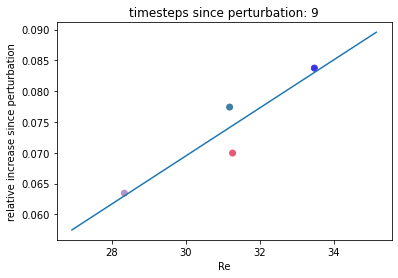

In [31]:
# relative increase after n timesteps 
# (this is not a proper definition for growth, but ok to get an idea)
rand_color = np.random.rand(len(Re2simul),3)
for n in range(1,len(relvar[0])):
    Re, rel_increase = list(zip(*[(Re , res["welf_var"][n]/res["welf_var"][0]) for Re, res in Re2simul.items()]))
    rel_increase = np.log(rel_increase)
    
    linres = scipy.stats.linregress(Re,rel_increase)
    Abest, bbest = linres.slope, linres.intercept
    print("A",round(Abest,6))
    print("b", round(bbest,5))
    
    xline = np.linspace(min(Re)*0.95, max(Re)*1.05)
    plt.plot(xline, (lambda x: Abest*x+bbest)(xline))
    plt.scatter(Re, rel_increase, c=rand_color)
    plt.title(f"timesteps since perturbation: {n}")
    plt.ylabel("relative increase since perturbation")
    plt.xlabel("Re")
    plt.show()
    #sleep(0.5) # commented out for when I rerun the notebook
    clear_output(wait=True)

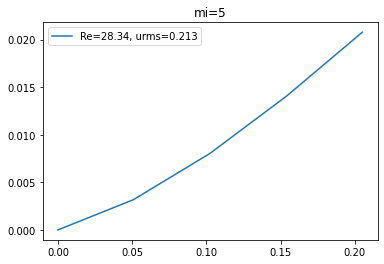

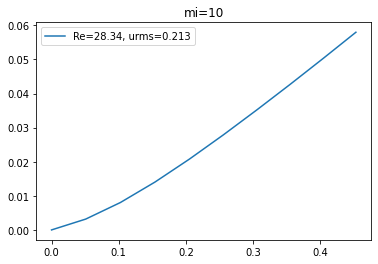

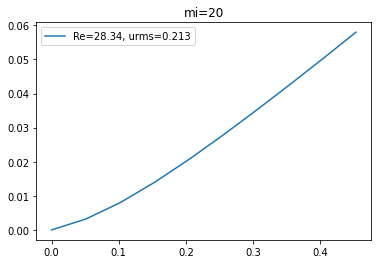

In [32]:
def normalize(data):
    return data/data[0]

def adjust(data):
    ln = np.log
    #return ln(data/data[0])
    #return ln(ln(data/data[0]) + 1) # still nonlinear growth
    #return ln(ln(ln(data/data[0]) + 1) + 1) # still nonlinear
    return ln(ln(ln(ln(data/data[0]) + 1) + 1) + 1) # still nonlinear


for mi in [5,10,20]:
    for Re, r in list(Re2simul.items())[::5]:
        relhel = opts[r["dir"]]["conf_options"]["relhel"]
        urms = np.mean(r["urms"])
        #plt.plot(r["time"], r["urms"])
        plt.plot(r["real_time"][:mi] - r["real_time"][0], adjust(r["welf_var"])[:mi], label=f"Re={round(Re,2)}, urms={round(urms, 3)}")

    x = linspace(0,1.4,20)
    

    #plt.xlim(0.0,0.4)
    #plt.ylim(0.999, 1.015)
    #plt.yscale("log")
    plt.title(f"mi={mi}")
    plt.legend()
    plt.show()  

much_smaller_mach_hopefully_1
Fitres(a=1.3898507140592693, b=0.2695961909506258, rsq=0.9998379268560681, a_err=0.006688209363027225, simul_name='much_smaller_mach_hopefully_1')


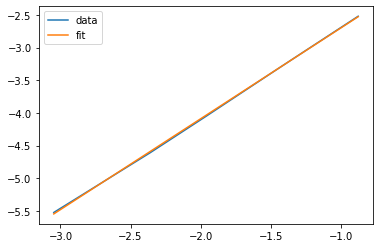

much_smaller_mach_hopefully_2
Fitres(a=1.386498943783277, b=0.1954923774900923, rsq=0.9999080518819085, a_err=0.005025299067164312, simul_name='much_smaller_mach_hopefully_2')


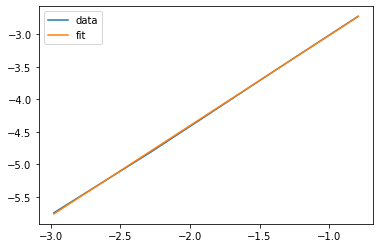

much_smaller_mach_hopefully_3
Fitres(a=1.4145066672491908, b=0.2415185084709418, rsq=0.9998266867131324, a_err=0.0070389769967056075, simul_name='much_smaller_mach_hopefully_3')


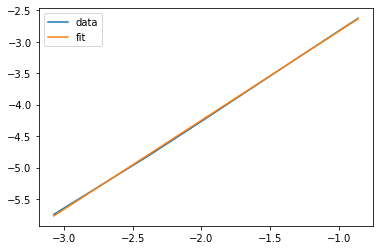

much_smaller_mach_hopefully_4
Fitres(a=1.4128476692931102, b=0.3280996478826132, rsq=0.9997752959475206, a_err=0.008005723220590632, simul_name='much_smaller_mach_hopefully_4')


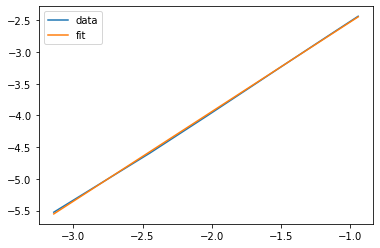

In [33]:
# fit through data
# model var(t)=b*t**a -> ln(var) = ln(b) + a*ln(t)
# so we find a and b by linear regression

@dataclass
class Fitres():
    a: float
    b: float
    rsq: float
    a_err : float
    simul_name : str
    
    def __call__(self, t):
        return self.b*t**self.a + 1
        
    
simul2fit = {}

show = True
for simul, Re, var, t in zip(active_list, Re_list, relvar, time_elapsed):
    
    # only use the first values (or cutoff==None for use all)
    #cutoff = None
    cutoff = 10
    e = cutoff
    
    # this ignores values that cant be put in log, not really the right way to go
    valid = (var[1:e] > 1)
    
    
    lnt = ln(t[1:e][valid])
    lnvar = ln(var[1:e][valid] -1)
    
    assert(np.all(~np.isnan(lnt)))
    assert(np.all(~np.isnan(lnvar)))
    
    
    linres = scipy.stats.linregress(lnt,lnvar)
    a, lnb = linres.slope, linres.intercept
    a_err = linres.stderr
    b = exp(lnb)
    rsq = linres.rvalue**2
    fitres = Fitres(a,b,rsq,a_err, simul)
    if show:
        print(simul)
        print(fitres)
        plt.plot(lnt, lnvar, label="data")
        plt.plot(lnt, lnb+ a*lnt, label="fit")
        plt.legend()
        plt.show()
        print("============")
    
    assert(fitres.simul_name == simul)
    simul2fit[simul] = fitres

much_smaller_mach_hopefully_1
Fitres(a=1.3898507140592693, b=0.2695961909506258, rsq=0.9998379268560681, a_err=0.006688209363027225, simul_name='much_smaller_mach_hopefully_1')


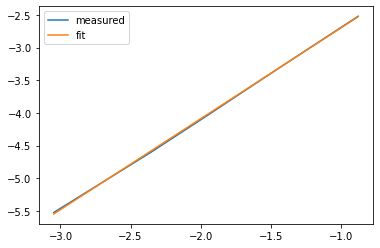

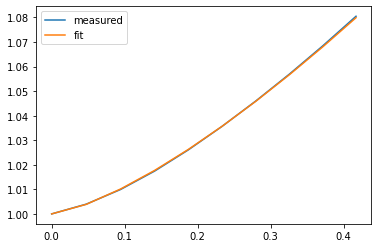

In [34]:
# visual checks on quality of fit

for simul, fitfun in list(simul2fit.items())[::5]:
    
    
    print("======================")
    assert(simul==fitfun.simul_name)
    print(simul)
    print(fitfun)
    
    # normalize and set to time since zero, otherwise no point
    t = res[simul]["real_time"] - res[simul]["real_time"][0]
    var = res[simul]["welf_var"]/res[simul]["welf_var"][0]
    
    plt.plot(ln(t[1:]), ln(var[1:]-1), label="measured")
    plt.plot(ln(t[1:]), ln(fitfun(t[1:])-1), label="fit")
    plt.legend()
    plt.show()
    
    plt.plot(t,var, label="measured")
    plt.plot(t,fitfun(t), label="fit")
    plt.legend()
    plt.show()
    
    
# it seems like the slope of the (logarithmic) data decreases with time, so a single exponential is maybe not accurate    

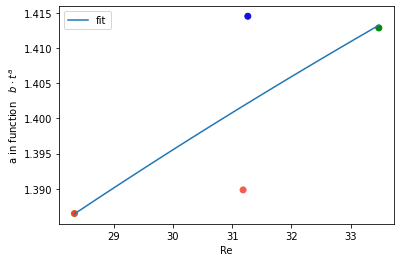

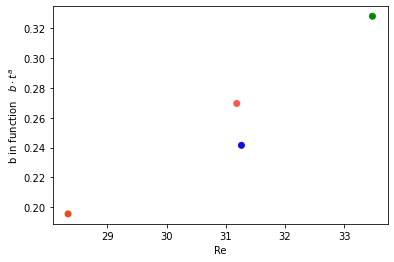

In [35]:
slope_vals = [fitres.a for _,fitres in simul2fit.items()]
intercept_vals = [fitres.b for _,fitres in simul2fit.items()]

# powerlaw fit through data assuming eq16 from Petry where c0 is const and sigma_half is a number
# lambda = c0*Re^sigma -> ln(lambda) = lnc0 + sigma*ln(Re)
valid_Re = np.array(Re_list)[~np.isnan(slope_vals)]
valid_slopes = np.array(slope_vals)[~np.isnan(slope_vals)]
fit = scipy.stats.linregress(ln(valid_Re), ln(valid_slopes))
sigma, lnc0 = fit.slope, fit.intercept
c0 = np.exp(lnc0)
Re_range = np.linspace(min(valid_Re), max(valid_Re), 100)


rand_color = np.random.rand(len(Re2simul),3)
plt.scatter(Re_list, slope_vals, c=rand_color)
plt.plot(Re_range, c0*Re_range**sigma, label="fit")
plt.ylabel("a in function   $b\cdot t^a$")
plt.xlabel("Re")
plt.legend()
plt.show()

plt.scatter(Re_list, intercept_vals, c=rand_color)
plt.ylabel("b in function   $b\cdot t^a$")
plt.xlabel("Re")
plt.show()

In [25]:
# bin by Re, then calculate an average for each bin
bins = list(range(70,150,5))
for i in range(len(bins)-1):
    low = bins[i]
    hi = bins[i+1]
    center = (low+hi)/2
    slopes = valid_slopes[np.logical_and(low <= valid_Re,valid_Re < hi)]
    print(center, len(slopes), round(np.mean(slopes),3) if len(slopes) > 0 else "-")

72.5 0 -
77.5 0 -
82.5 0 -
87.5 0 -
92.5 0 -
97.5 0 -
102.5 0 -
107.5 0 -
112.5 0 -
117.5 0 -
122.5 0 -
127.5 0 -
132.5 0 -
137.5 0 -
142.5 0 -


In [26]:
print("Re: ", np.mean(valid_Re))
print("slope: ",np.mean(valid_slopes))

Re:  38.1152109629851
slope:  1.4104026872882058


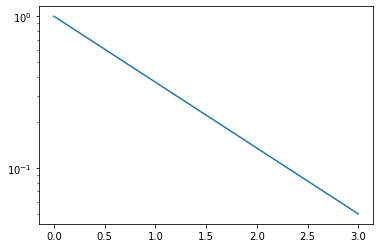

In [128]:
x = linspace(0,3,100)
y = exp(-x)
plt.plot(x,y)
plt.yscale("log")
plt.show()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


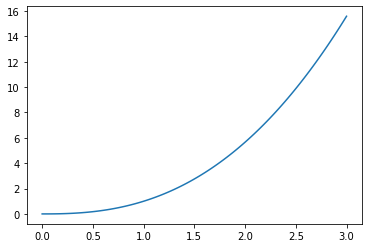

In [129]:
y = x**2.5
normalize(y)
plt.plot(x,y)
plt.show()

In [130]:
"""
with open("low_perturb", "r") as f:
    s = f.read()
    data = json.loads(s)
    
times = np.array(list(map(int, data.keys())))
naive_var = np.array([data[str(t)]["naive_var"] for t in times])
plt.plot(times, naive_var)
"""

'\nwith open("low_perturb", "r") as f:\n    s = f.read()\n    data = json.loads(s)\n    \ntimes = np.array(list(map(int, data.keys())))\nnaive_var = np.array([data[str(t)]["naive_var"] for t in times])\nplt.plot(times, naive_var)\n'

[0.40824829 0.81649658 0.40824829]
(128, 128, 128)
(3,)


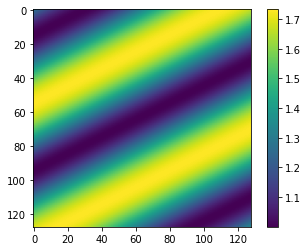

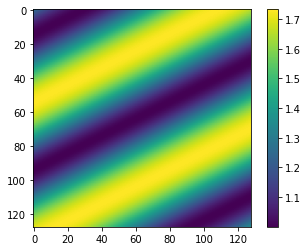

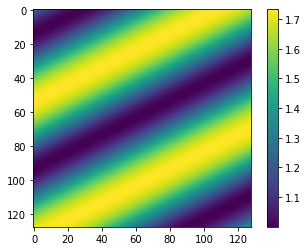

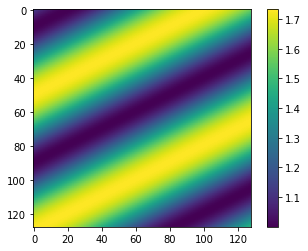

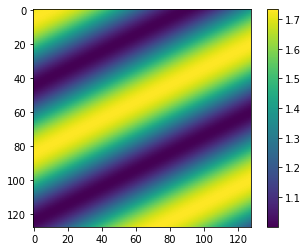

In [131]:
def mydot(xx, xy, xz, v):
    assert(len(v)==3)
    return xx*v[0] + xy*v[1] + xz*v[2]

def mycross(xx,xy,xz,v):
    assert(len(v)==3)
    xres = xy*v[2] - xz*v[1]
    yres = xz*v[0] - xx*v[2]
    zres = xx*v[1] - xy*v[0]
    return np.array([xres, yres, zres])

def f_no_hel(xx, xy, xz, k, e, phi, N):
    assert(len(e)==3)
    assert(isinstance(phi, float))
    assert(isinstance(N, float))
    
    pref = N/np.sqrt(np.dot(k,k) - np.dot(k,e))
    cross = np.cross(k,e)
    dot = mydot(xx,xy,xz,k)
    print(dot.shape)
    print(cross.shape)
    fx = np.cos(pref * cross[0] *(dot + phi))
    fy = np.cos(pref * cross[1] *(dot + phi))
    fz = np.cos(pref * cross[2] *(dot + phi))
    return (fx, fy, fz)

xinds = arange(0,128)*0.049087
xx, xy, xz= meshgrid(xinds,xinds,xinds)

phi = 1.0
N = 1.0
k = np.array([1,2,1], dtype=np.float)
e = np.array([1,1,1], dtype=np.float)
k /= sqrt(sum(k**2))
e /= sqrt(sum(e**2))
print(k)

fx, fy, fz = f_no_hel(xx,xy,xz,k,e,phi,N)

mag = sqrt(fx*fx + fy*fy + fz*fz)
for i in [0,1,2,10,100]:
    plt.imshow(mag[:,i,:])
    plt.colorbar()
    plt.show()


In [132]:
def next_int(x,c):
    return (x) + c-(x)%c

for i in range(20):
    print(i, next_int(i,2))

0 2
1 2
2 4
3 4
4 6
5 6
6 8
7 8
8 10
9 10
10 12
11 12
12 14
13 14
14 16
15 16
16 18
17 18
18 20
19 20


In [133]:
baserun_len = 20000
baserun_dump_freq = 1000
perturbation_len = 3
perturbation_dump_freq = 1
final_len = 100
final_dump_freq = 5

# x+c-x%c is the first number strictly bigger than x that is divisible by c
def next_int(x,c):
    return x+c-x%c

baserun_dump_steps = range(0,baserun_len+1, baserun_dump_freq)
perturbation_dump_steps = range(next_int(baserun_len,perturbation_dump_freq), baserun_len+perturbation_len+1, perturbation_dump_freq)
final_dump_steps = range(next_int(baserun_len+perturbation_len, final_dump_freq), baserun_len+perturbation_len+final_len+1, final_dump_freq)

for i in baserun_dump_steps:
    print(i)
print("====")
for i in perturbation_dump_steps:
    print(i)
print("====")
for i in final_dump_steps:
    print(i)
print("====")

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
====
20001
20002
20003
====
20005
20010
20015
20020
20025
20030
20035
20040
20045
20050
20055
20060
20065
20070
20075
20080
20085
20090
20095
20100
====


In [134]:
for k,v in locals().items():
    if len(k)<=3:
        print(k,str(v)[:10])

_ih ['', 'impo
_oh {14: '\nwi
_dh ['/home/ju
In ['', 'impo
Out {14: '\nwi
_ 
with open
__ 
with open
___ 
with open
_i baserun_le
_ii def next_i
_i1 import num
np <module 'n
ln <ufunc 'lo
rec <module 'n
dot <function 
Inf inf
inf inf
nan nan
NaN nan
all <function 
any <function 
ptp <function 
put <function 
std <function 
sum <function 
var [1.       
NAN nan
add <ufunc 'ad
cos <ufunc 'co
e [0.5773502
exp <ufunc 'ex
gcd <ufunc 'gc
lcm <ufunc 'lc
log <ufunc 'lo
mod <ufunc 're
pi 3.14159265
sin <ufunc 'si
tan <ufunc 'ta
mat <function 
r_ <numpy.lib
c_ <numpy.lib
s_ <numpy.lib
ix_ <function 
cov <function 
i0 <function 
eye <function 
tri <function 
fix <function 
pad <function 
who <function 
fv <function 
pmt <function 
pv <function 
irr <function 
npv <function 
fft <module 'n
ma <module 'n
plt <module 'm
os <module 'o
csv <module 'c
it <module 'i
_i2 print("\n"
_i3 interestin
_i4 ##########
d same_param
_i5 

res = {}
res {'same_par
f <_io.TextI
row OrderedDic
k row
v row
_i6 Re2simu